<a href="https://colab.research.google.com/github/Priyanshi-Premkumar/19MIC0051/blob/main/Text_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import requests
from bs4 import BeautifulSoup

url = "https://www.amazon.in/Samsung-Fully-Automatic-WA70A4002GS-TL-Imperial/product-reviews/B08GXYZFNB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"
# Function to fetch reviews from the URL
def fetch_reviews(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    reviews = soup.find_all('div', {'data-hook': 'review'})

    extracted_reviews = []
    for review in reviews:
        name = review.find('span', {'class': 'a-profile-name'}).text.strip()
        text = review.find('span', {'class': 'review-text'}).text.strip()
        extracted_reviews.append({'name': name, 'review': text})

    return extracted_reviews

# Fetch 500 reviews
all_reviews = []
for page_num in range(1, 501):  # Assuming each page has 50 reviews, so we fetch 10 pages (500 reviews)
    page_url = url + "?pageNumber=" + str(page_num)
    all_reviews.extend(fetch_reviews(page_url))

# Save reviews to CSV
csv_file = 'amazon_reviews.csv'
fieldnames = ['name', 'review']

with open(csv_file, 'w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(all_reviews)

print(f"Reviews saved to '{csv_file}' successfully.")


Reviews saved to 'amazon_reviews.csv' successfully.


In [2]:
import nltk
nltk.download('opinion_lexicon')

from nltk.corpus import opinion_lexicon

positive_words = opinion_lexicon.positive()

# Print the positive words
print(positive_words)


['a+', 'abound', 'abounds', 'abundance', 'abundant', ...]


[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


In [3]:
import nltk

# Download the positive words corpus
nltk.download('opinion_lexicon')

# Get the positive words from the corpus
positive_words = set(nltk.corpus.opinion_lexicon.positive())

# Save positive words to a file
with open('positive_words.txt', 'w') as file:
    file.write('\n'.join(positive_words))

print("Positive words saved to 'positive_words.txt' successfully.")


Positive words saved to 'positive_words.txt' successfully.


[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


In [4]:
import nltk

# Download the opinion_lexicon corpus
nltk.download('opinion_lexicon')

# Load the negative words from the opinion_lexicon corpus
negative_words = set()
for word in nltk.corpus.opinion_lexicon.words('negative-words.txt'):
    negative_words.add(word.strip())

# Save negative words to a text file
with open('negative_words.txt', 'w', encoding='utf-8') as file:
    file.write('\n'.join(negative_words))

print("Negative words saved to 'negative_words.txt' successfully.")


Negative words saved to 'negative_words.txt' successfully.


[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

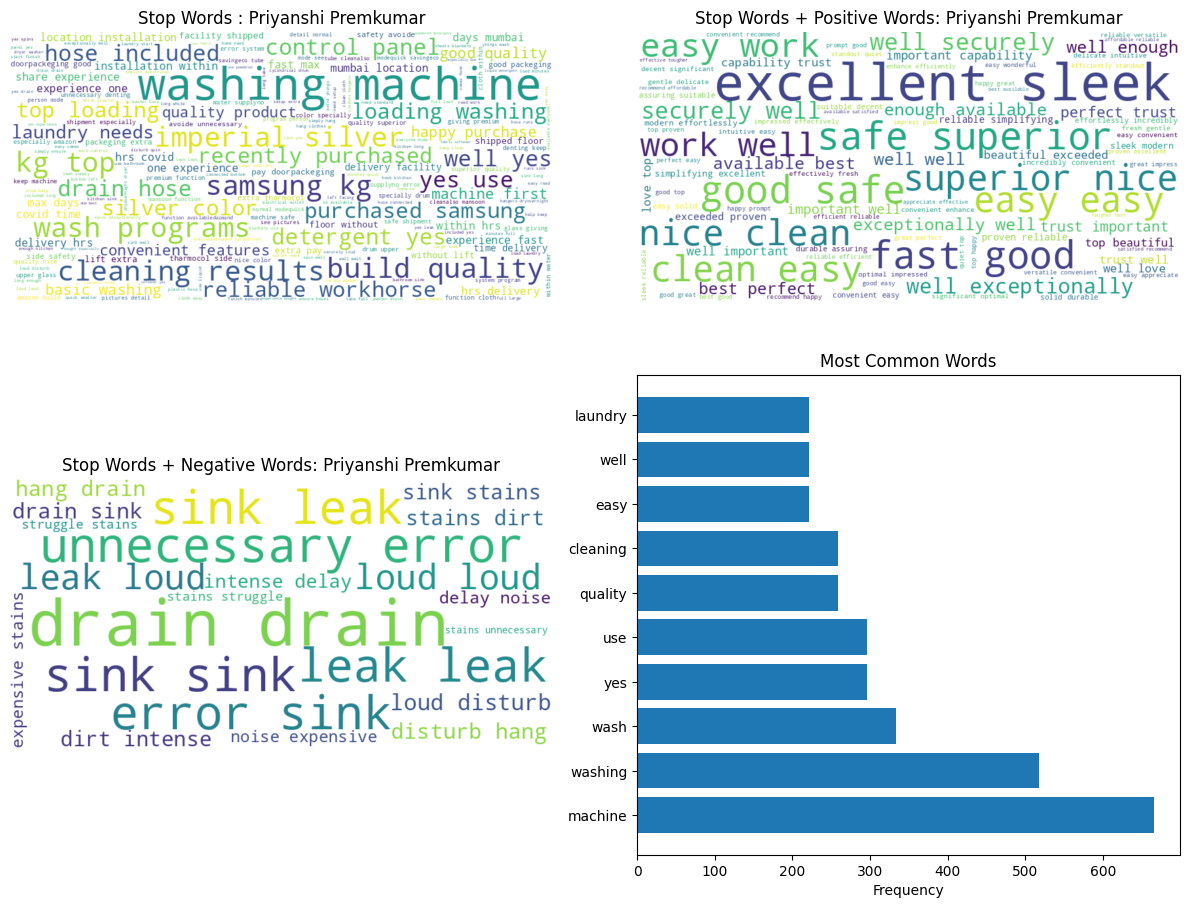

Total reviews: 370
Total words: 23310
Positive words: 3515
Negative words: 851

Most Common Words:
machine: 666
washing: 518
wash: 333
yes: 296
use: 296
quality: 259
cleaning: 259
easy: 222
well: 222
laundry: 222


In [10]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load stop words
stop_words = set(stopwords.words('english'))

# Load positive words
with open('/content/positive_words.txt', 'r') as f:
    positive_words = set(f.read().splitlines())

# Load negative words
with open('/content/negative_words.txt', 'r') as f:
    negative_words = set(f.read().splitlines())

# Function to process reviews and filter out stop words
def process_reviews(reviews):
    tokenized_reviews = nltk.word_tokenize(reviews.lower())
    filtered_reviews = [word for word in tokenized_reviews if word.isalpha() and word not in stop_words]
    return filtered_reviews

# Read reviews from CSV file
df = pd.read_csv('amazon_reviews.csv')

# Extract the review column from the DataFrame
reviews = df['review'].str.cat(sep=' ')

# Process the reviews
filtered_reviews = process_reviews(reviews)

# Filter reviews for positive and negative words
positive_reviews = [word for word in filtered_reviews if word in positive_words]
negative_reviews = [word for word in filtered_reviews if word in negative_words]

# Create word clouds
stopwords_cloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_reviews))
positive_cloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews))
negative_cloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_reviews))

# Calculate word frequencies
word_freq = nltk.FreqDist(filtered_reviews)
most_common_words = word_freq.most_common(10)

# Display the word clouds and details
plt.figure(figsize=(12, 10))
plt.subplot(221)
plt.imshow(stopwords_cloud, interpolation='bilinear')
plt.title('Stop Words : Priyanshi Premkumar')
plt.axis('off')

plt.subplot(222)
plt.imshow(positive_cloud, interpolation='bilinear')
plt.title('Stop Words + Positive Words: Priyanshi Premkumar')
plt.axis('off')

plt.subplot(223)
plt.imshow(negative_cloud, interpolation='bilinear')
plt.title('Stop Words + Negative Words: Priyanshi Premkumar')
plt.axis('off')

plt.subplot(224)
plt.barh([word[0] for word in most_common_words], [word[1] for word in most_common_words])
plt.title('Most Common Words')
plt.xlabel('Frequency')

plt.tight_layout()
plt.show()

# Print details
print(f"Total reviews: {len(df)}")
print(f"Total words: {len(filtered_reviews)}")
print(f"Positive words: {len(positive_reviews)}")
print(f"Negative words: {len(negative_reviews)}")
print("\nMost Common Words:")
for word in most_common_words:
    print(f"{word[0]}: {word[1]}")


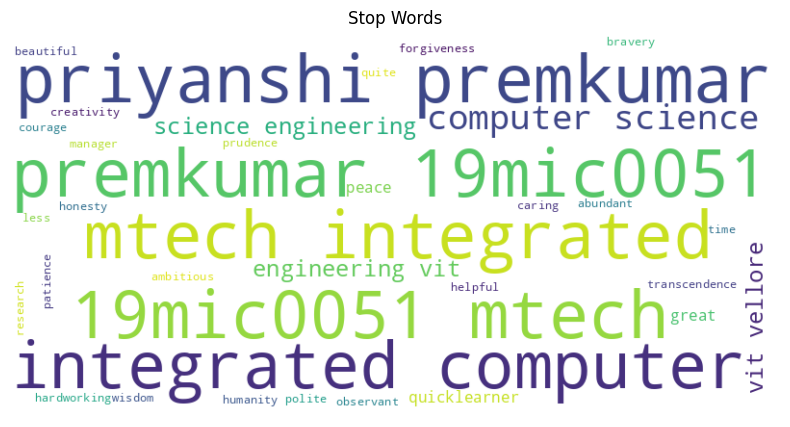

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Load stop words
stop_words = set(stopwords.words('english'))

# Load positive words
with open('/content/positive_words.txt', 'r') as f:
    positive_words = set(f.read().splitlines())

# Load negative words
with open('/content/positive_words.txt', 'r') as f:
    negative_words = set(f.read().splitlines())

# Process reviews and filter words

reviews = [
    "Priyanshi Premkumar,19MIC0051,MTech Integrated Computer science and Engineering,VIT,Vellore,Great, Hardworking, Ambitious, Great, Abundant",
    "Priyanshi Premkumar,19MIC0051,MTech Integrated Computer science and Engineering,VIT,vellore,Time Manager,Bravery,Courage,Less Patience.",
    "Priyanshi Premkumar,19MIC0051,MTech Integrated Computer science and Engineering,VIT,Vellore,QuickLearner, Wisdom,Humanity,Peace.",
    "Priyanshi Premkumar,19MIC0051,MTech Integrated Computer science and Engineering,VIT,Vellore,Transcendence,Forgiveness,Prudence,Peace.",
    "Priyanshi Premkumar,19MIC0051,MTech Integrated Computer science and Engineering,VIT,Vellore,QuickLearner,Honesty,Creativity,Observant.",
    "Priyanshi Premkumar,19MIC0051,MTech Integrated Computer science and Engineering,VIT,Vellore,Helpful,Polite,Caring,Beautiful,Quite,Research.",
  
]

filtered_words = []
positive_filtered_words = []
negative_filtered_words = []

for review in reviews:
    words = review.lower().split()
    words_without_stopwords = [word for word in words if word not in stop_words]
    filtered_words.extend(words_without_stopwords)
    positive_filtered_words.extend([word for word in words_without_stopwords if word in positive_words])
    negative_filtered_words.extend([word for word in words_without_stopwords if word in negative_words])

# Generate word clouds
def generate_word_cloud(words, title):
    if len(words) > 0:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(title)
        plt.show()
    else:
        print(f"No words found for {title}.")

# Generate word clouds for stop words, stop words + positive words, and stop words + negative words
generate_word_cloud(filtered_words, 'Stop Words')
